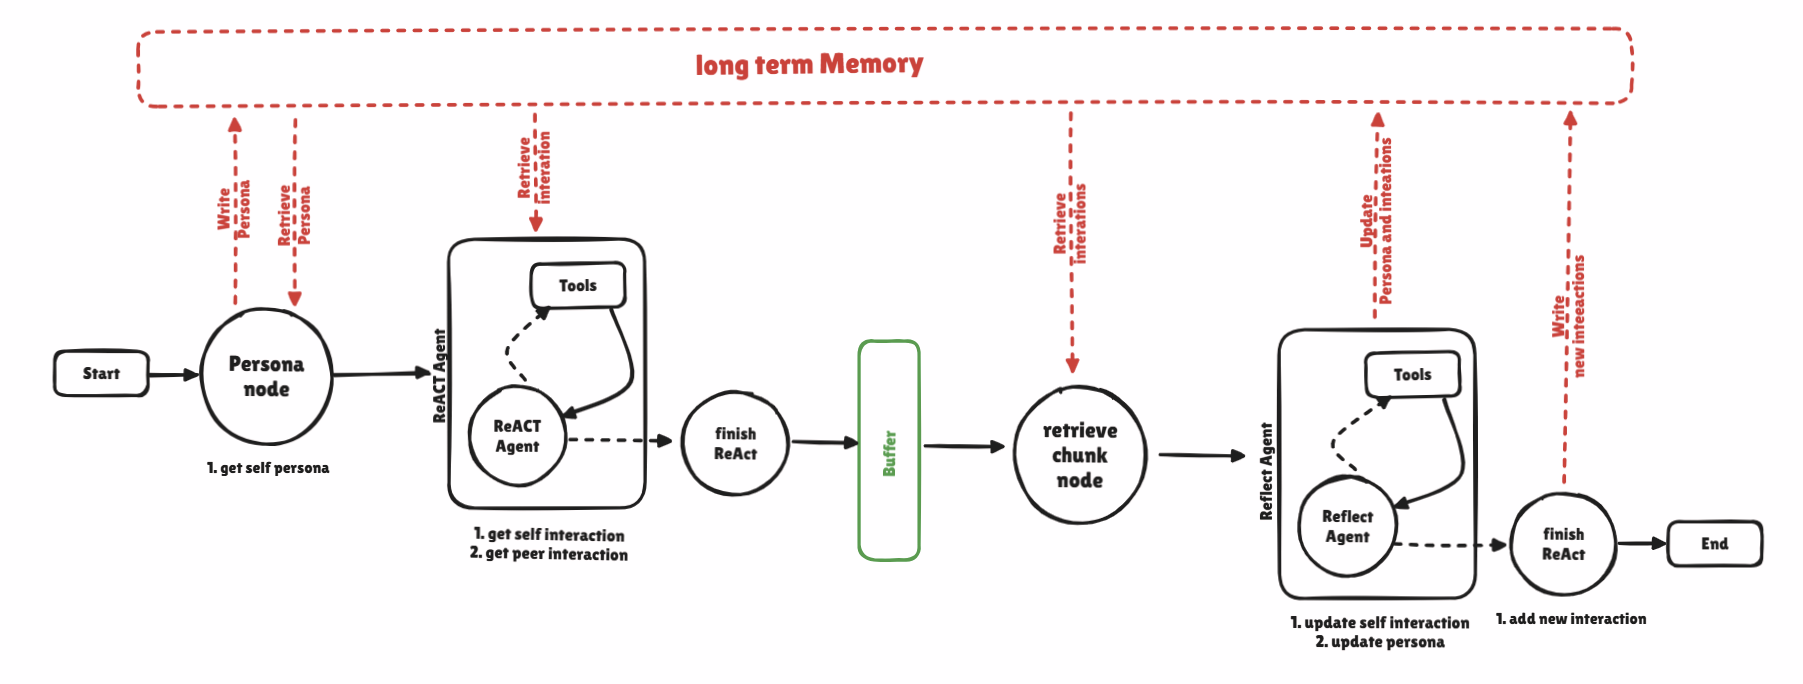

# Visualizaion

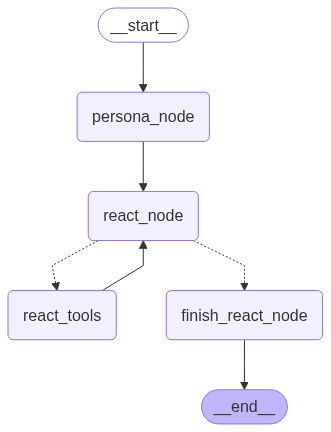

In [ ]:
# from agent.react_agent import build_react_graph, visualize_graph
# react_agent = build_react_graph()
# visualize_graph(react_agent)

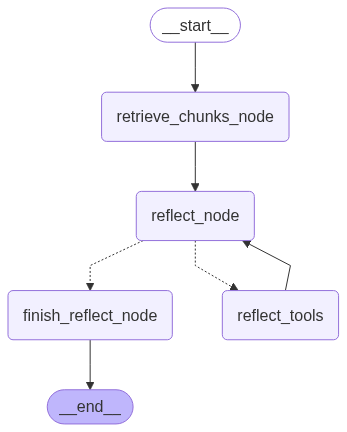

In [ ]:
# from agent.reflect_agent import build_reflect_graph, visualize_graph
# reflect_agent = build_reflect_graph()
# visualize_graph(reflect_agent)

# memory init

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import json
import os
from tqdm.notebook import tqdm, trange

from memory.memory_manager import MemoryManager, memory_initalize, set_memory
from agentic_rag.config import CHROMA_DB_PATH, BASE_URL, EMBEDDING_MODEL_NAME
from agentic_rag.agent.run_agent import run_batch_agent

In [3]:
memory = MemoryManager(db_path=CHROMA_DB_PATH, embedding_model=EMBEDDING_MODEL_NAME, base_url=BASE_URL)
set_memory(memory)

In [7]:
# dir_path = "data/input/memory_init/memory_init_12"
# dir_path = "data/input/memory_init/memory_init_all"
# files = os.listdir(dir_path)
files = ['u_13.jsonl',
 'u_19.jsonl',
 'u_14.jsonl',
 'u_10.jsonl']

In [ ]:
dir_path = "data/input/memory_init/memory_init_12"
# # dir_path = "data/input/memory_init/memory_init_all"
# files = os.listdir(dir_path)

for user in tqdm(files):
    with open(f'{dir_path}/{user}', 'r') as f:
        data = []
        for l in f:
            data.append(json.loads(l))

    memory_initalize(data[0], chunk_type='persona')
    print(user)
    for i in trange(len(data)):
        memory_initalize(data[i], chunk_type='interaction')

  0%|          | 0/4 [00:00<?, ?it/s]

u_13.jsonl


  0%|          | 0/283 [00:00<?, ?it/s]

u_19.jsonl


  0%|          | 0/20 [00:00<?, ?it/s]

u_14.jsonl


  0%|          | 0/20 [00:00<?, ?it/s]

u_10.jsonl


  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
# memory.get_chunk_by_id('u_08_01')

# Run

In [12]:
dir_path = "data/input/memory_init/input"
files = os.listdir(dir_path)

for fname in sorted(files):
    file_path = os.path.join(dir_path, fname)
    with open(file_path, "r", encoding="utf-8") as f:
        num_lines = sum(1 for _ in f)
    print(f"{fname}: {num_lines} lines")


u_01.jsonl: 94 lines
u_06.jsonl: 108 lines
u_08.jsonl: 110 lines
u_10.jsonl: 46 lines
u_11.jsonl: 41 lines
u_12.jsonl: 48 lines
u_14.jsonl: 86 lines
u_19.jsonl: 83 lines
u_44.jsonl: 80 lines


u_12 - u_14 - u_01
u_10 - u_19 - u_06
u_11 - u_44 - u_08

In [4]:
user = 'u_08'
test = 'half_init' # 'all_init
write_every_n_batches = 1
batch_size = 5

input_jsonl_path = f"data/input/memory_init/input/{user}.jsonl"
output_jsonl_path = f"test/{test}_{user}.jsonl"
progress_log_path = f"test/{test}_{user}.txt"
debug="both"

In [6]:
# run_batch_agent(
#     input_jsonl_path,
#     output_jsonl_path,
#     batch_size,
#     debug,
#     write_every_n_batches,
#     progress_log_path
# )